In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Load CSV file
data = pd.read_csv('Roman-Urdu-Poetry.csv')

# Filter the first 800 rows for training
data = data.head(800)

# Extract the poetry column
poetry = data['Poetry'].values

# Tokenize the poetry text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(poetry)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(poetry)

# Get the maximum sequence length
max_len = max([len(seq) for seq in sequences])

# Pad sequences to have equal length
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

# Split the sequences into input (X) and output (y)
X = sequences[:, :-1]  # Input: all words except last
y = sequences[:, -1]   # Output: last word (target)

# Get the vocabulary size
vocab_size = len(tokenizer.word_index) + 1


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=8386, output_dim=50, input_length=5))  # Explicit shape
model.add(LSTM(128, return_sequences=True))  # First LSTM layer
model.add(LSTM(128))  # Second LSTM layer
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dense(11044, activation='softmax'))  # Output layer

# Force model to build
model.build(input_shape=(None, 5))  # Explicitly define input shape

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 5, 50)               │         419,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 5, 128)              │          91,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11044)               │       1,424,676 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,083,720 (7.95 MB)

 Trainable params: 2,083,720 (7.95 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store history
history = model.fit(X, y, epochs=65, batch_size=32, validation_split=0.2)  # 20% data for validation

# Plot accuracy and loss
import matplotlib.pyplot as plt

# Extract values
loss = history.history['loss']
val_loss = history.history.get('val_loss', [])  # Handles case if no validation data
accuracy = history.history.get('accuracy', history.history.get('acc'))  # Handles different versions
val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc', []))

epochs_range = range(1, len(loss) + 1)

Epoch 1/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6739 - loss: 1.1020 - val_accuracy: 0.6062 - val_loss: 1.3179
Epoch 2/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7881 - loss: 0.8594 - val_accuracy: 0.5500 - val_loss: 1.4678
Epoch 3/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8646 - loss: 0.7537 - val_accuracy: 0.5813 - val_loss: 1.5526
Epoch 4/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8693 - loss: 0.6853 - val_accuracy: 0.5813 - val_loss: 1.6878
Epoch 5/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9074 - loss: 0.6471 - val_accuracy: 0.5625 - val_loss: 1.7686
Epoch 6/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8995 - loss: 0.6113 - val_accuracy: 0.5625 - val_loss: 1.8946
Epoch 7/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9136 - loss: 0.6058 - val_accuracy: 0.5375 - val_loss: 1.9241
Epoch 8/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9232 - loss: 0.5154 - val_accuracy: 0.5437 - val_loss:

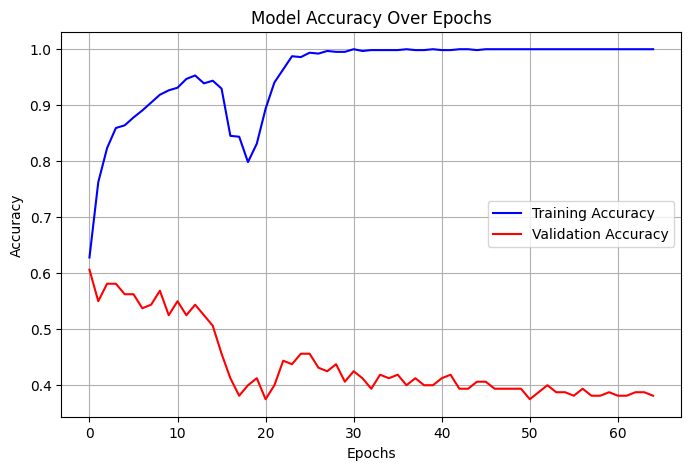

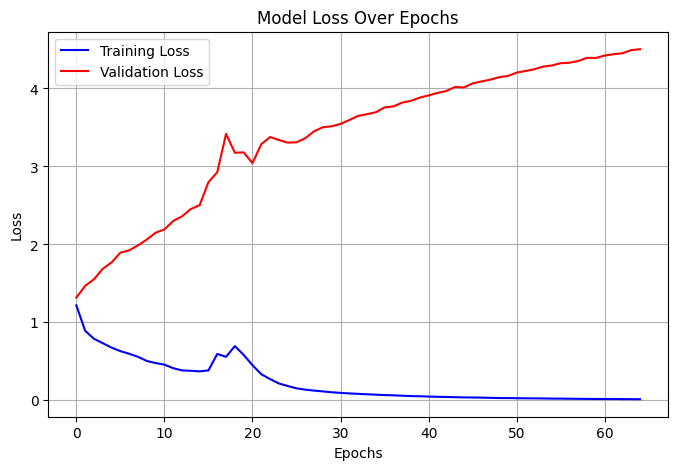

In [9]:
import matplotlib.pyplot as plt

# Plot Accuracy Graph
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss Graph
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Save the trained model
model.save('poetrymodel.h5')

In [11]:
import numpy as np

def top_k_sampling(pred_probs, k=5):
    """Select the top-k most likely next words and sample from them."""
    top_k_indices = np.argsort(pred_probs)[-k:]  # Get the top k indices
    top_k_probs = pred_probs[top_k_indices]  # Get the corresponding probabilities
    top_k_probs = top_k_probs / np.sum(top_k_probs)  # Normalize to get a valid probability distribution
    return np.random.choice(top_k_indices, p=top_k_probs)  # Sample from top k words

def top_p_sampling(pred_probs, p=0.9):
    """Select the top-p most likely next words (nucleus sampling)."""
    sorted_indices = np.argsort(pred_probs)[::-1]  # Sort probabilities in descending order
    sorted_probs = pred_probs[sorted_indices]
    cumulative_probs = np.cumsum(sorted_probs)

    # Find the cutoff index where the cumulative probability exceeds p
    cutoff_index = np.where(cumulative_probs >= p)[0][0] + 1
    filtered_indices = sorted_indices[:cutoff_index]
    filtered_probs = sorted_probs[:cutoff_index]
    filtered_probs = filtered_probs / np.sum(filtered_probs)  # Normalize to get a valid probability distribution

    return np.random.choice(filtered_indices, p=filtered_probs)  # Sample from top p words

def generate_poetry(model, tokenizer, start_word, num_words_per_line=10, num_lines=3, temperature=1.0, sampling_method='top_k', k=5, p=0.9):
    # Initialize the poem with the starting word and the first line
    poem = start_word
    sequence = tokenizer.texts_to_sequences([start_word])
    sequence = pad_sequences(sequence, maxlen=model.input_shape[1], padding='pre')

    for line_num in range(num_lines):
        # For each line after the first one, don't add the starting word again
        if line_num > 0:
            line = ""  # Start the line without the starting word
        else:
            line = start_word  # First line should start with the starting word

        for _ in range(num_words_per_line - 1):  # Subtract 1 because we already have the first word in the line
            # Predict the next word probabilities
            pred_probs = model.predict(sequence)[0]

            # Apply temperature scaling
            pred_probs = np.asarray(pred_probs).astype('float64')
            pred_probs = np.log(pred_probs) / temperature
            pred_probs = np.exp(pred_probs) / np.sum(np.exp(pred_probs))  # Normalize to get probabilities

            # Apply the selected sampling method
            if sampling_method == 'top_k':
                predicted_word_index = top_k_sampling(pred_probs, k=k)
            elif sampling_method == 'top_p':
                predicted_word_index = top_p_sampling(pred_probs, p=p)
            else:
                # Default to random choice based on probabilities
                predicted_word_index = np.random.choice(range(len(pred_probs)), p=pred_probs)

            predicted_word = tokenizer.index_word.get(predicted_word_index, "")

            if predicted_word == "":  # If the predicted word is empty, break the loop
                break

            line += ' ' + predicted_word

            # Update the sequence with the newly predicted word
            sequence = np.append(sequence[:, 1:], predicted_word_index).reshape(1, -1)

        # Add the generated line to the poem
        poem += '\n' + line

    return poem


In [12]:
# Prompt the user to enter the starting word, number of words per line, number of lines, and sampling method
start_word = input("Enter the starting word: ")
num_words_per_line = int(input("Enter the number of words per line: "))
num_lines = int(input("Enter the number of lines: "))
temperature = float(input("Enter the temperature (e.g., 0.5 for more creative results): "))
sampling_method = input("Enter the sampling method ('top_k' or 'top_p'): ")

# Set parameters for top-k or top-p sampling
k = 5  # For top-k sampling, the number of words to consider
p = 0.9  # For top-p sampling, the cumulative probability threshold

# Generate the poetry based on the input
generated_poem = generate_poetry(model, tokenizer, start_word, num_words_per_line=num_words_per_line, num_lines=num_lines, temperature=temperature, sampling_method=sampling_method, k=k, p=p)

print("\nGenerated Poetry:\n")
print(generated_poem)


Enter the starting word: 6
Enter the number of words per line: 7
Enter the number of lines: 4
Enter the temperature (e.g., 0.5 for more creative results): 1.2
Enter the sampling method ('top_k' or 'top_p'): top_k
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


<ipython-input-11-393bb0c41b72>:43: RuntimeWarning: divide by zero encountered in log
  pred_probs = np.log(pred_probs) / temperature


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

Generated Poetry:

6
6 tan tan saaqī nikleñ bhūleñ ḳhū
 īl dhīme dhīme dhīme jiye bhūleñ
 īl dhīme dīz īl dhīme tan
 hargiz 